In [1]:

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model=YOLO('yolov8n.pt')

In [3]:
!pip install opencv-python

In [4]:
import cv2
print("OpenCV version:", cv2.__version__)

OpenCV version: 4.10.0


In [5]:
from IPython.display import display, clear_output
import PIL.Image


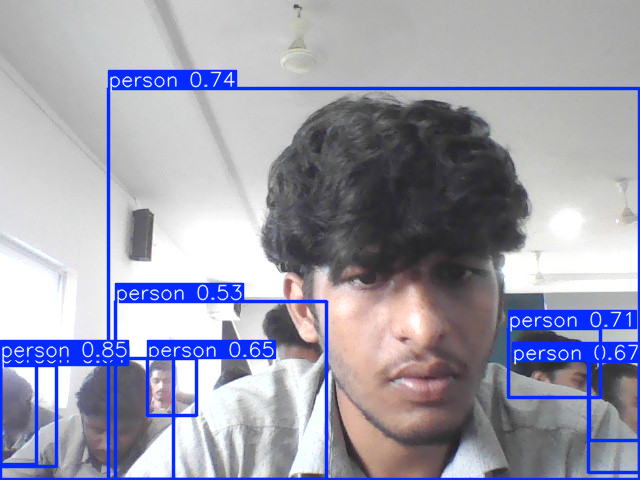


Stopped by user.


In [11]:
# Open the webcam (0 for the default camera)
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    cap.release()

try:
    while cap.isOpened():
        # Capture a frame from the webcam
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture an image.")
            break

        # Perform object detection on the frame
        results = model(frame)

        # Annotate the frame with detection results
        annotated_frame = results[0].plot()

        # Convert BGR (OpenCV) to RGB (Pillow) for proper display in Jupyter
        img = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)
        img_display = PIL.Image.fromarray(img)

        # Display the image in Jupyter Notebook
        clear_output(wait=True)
        display(img_display)

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    # Release the webcam and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()